In [12]:
from skimage import io, morphology, filters, segmentation
from skimage.color import rgb2gray, rgba2rgb
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from src.preprocessing import process_video,get_video, resize, preprocess
from skimage.color import label2rgb


# colors = cm.Blues(np.linspace(0.2, 1, 3))

In [13]:
label_video = get_video('images/cheese_gel.avi', threshold=None, skip_size=239)
# im = io.imread("images/last_pic_zoomed.png")

In [14]:
thr1 = 0.15
thr2 = 0.6
size=100

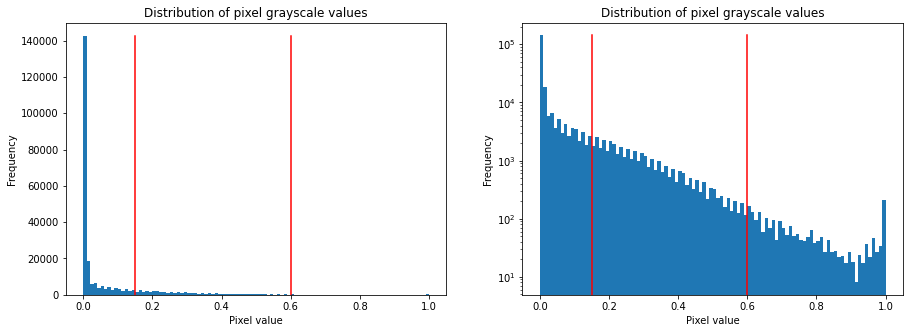

In [15]:
im = label_video[1] [200:700,200:700]
fig, ax = plt.subplots(1, 2, figsize=(15,5))
# plt.axis("off")
# plt.tight_layout()
# plt.imshow(im)
n, bins, patches = ax[0].hist(im.flatten(), bins=100)
ax[0].plot([thr1, thr1], [0, n[0]], 'r-')
ax[0].plot([thr2, thr2], [0, n[0]], 'r-')
ax[0].set_xlabel('Pixel value')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Distribution of pixel grayscale values')

n, bins, patches = ax[1].hist(im.flatten(), bins=100)
ax[1].plot([thr1, thr1], [0, n[0]], 'r-')
ax[1].plot([thr2, thr2], [0, n[0]], 'r-')
ax[1].set_yscale('log')
ax[1].set_xlabel('Pixel value')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Distribution of pixel grayscale values')

plt.show()

In [16]:
im = resize(label_video[1], size=size)
im = preprocess(im, threshold=thr1, smooth=0.)

8209.0


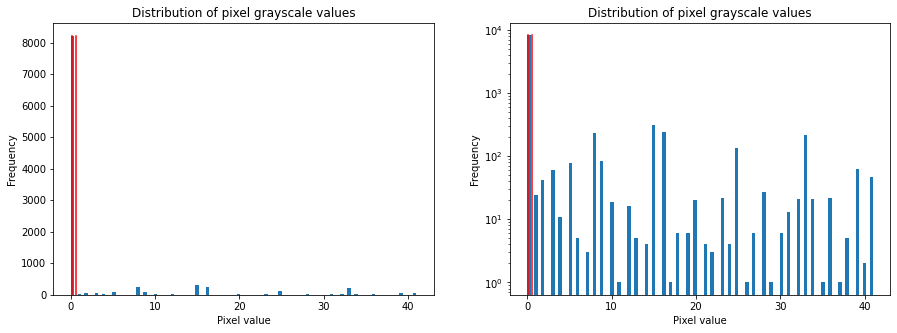

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
# plt.axis("off")
# plt.tight_layout()
# plt.imshow(im)
n, bins, patches = ax[0].hist(im.flatten(), bins=100)
print(n[0])
ax[0].plot([thr1, thr1], [0, n[0]], 'r-')
ax[0].plot([thr2, thr2], [0, n[0]], 'r-')
ax[0].set_xlabel('Pixel value')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Distribution of pixel grayscale values')

n, bins, patches = ax[1].hist(im.flatten(), bins=100)
ax[1].plot([thr1, thr1], [0, n[0]], 'r-')
ax[1].plot([thr2, thr2], [0, n[0]], 'r-')
ax[1].set_yscale('log')
ax[1].set_xlabel('Pixel value')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Distribution of pixel grayscale values')

plt.show()

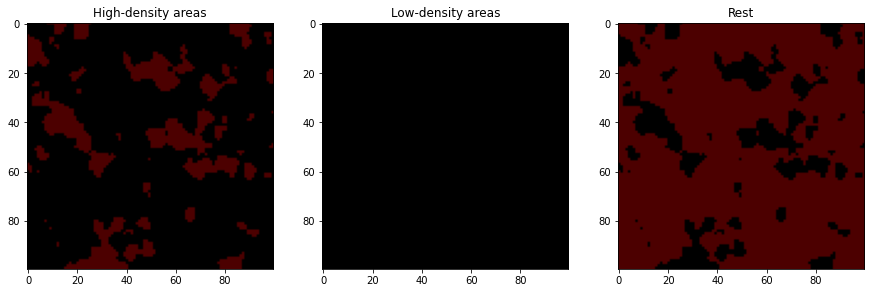

In [18]:
hi_dens = im > thr2
low_dens = np.logical_and(im > thr1, im < thr2)
rest = np.logical_not(np.logical_or(hi_dens,low_dens))

image_label_overlay_hi = label2rgb(hi_dens, image=im)
image_label_overlay_low = label2rgb(low_dens, image=im)
image_label_overlay_rest = label2rgb(rest, image=im)

fig, ax = plt.subplots(1, 3, figsize=(15,5)) # figsize sets size in inches
ax[0].imshow(image_label_overlay_hi)
ax[0].set_title('High-density areas')
ax[1].imshow(image_label_overlay_low,cmap='gray')
ax[1].set_title('Low-density areas')
ax[2].imshow(image_label_overlay_rest,cmap='gray')
ax[2].set_title('Rest')
plt.show()

In [19]:
inv_image = np.absolute(im - 1)

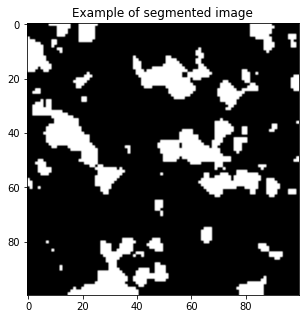

In [20]:
plt.rcParams['image.cmap'] = 'Greys'
def over (x):
    if x > thr2:
        return 0
    if x < thr1:
        return 2
    else:
        return 1
    
def under (x):
    if x > thr2:
        return 2
    if x < thr1:
        return 0
    else:
        return 1
    
over_vec = np.vectorize(over)
im_thresh = over_vec(im)
# im_thresh = over_vec(inv_image)


# fig, ax = plt.subplots(1, 2, figsize=(10,5)) # figsize sets size in inches
# ax[0].imshow(im_thresh)
# ax[0].set_title('High-density areas')
# ax[1].imshow(image_label_overlay_low,cmap='gray')
# ax[1].set_title('Low-density areas')
# ax[2].imshow(image_label_overlay_rest,cmap='gray')
# ax[2].set_title('Rest')
# plt.show()

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.set_title('Example of segmented image')
ax.imshow(im_thresh)
plt.show()

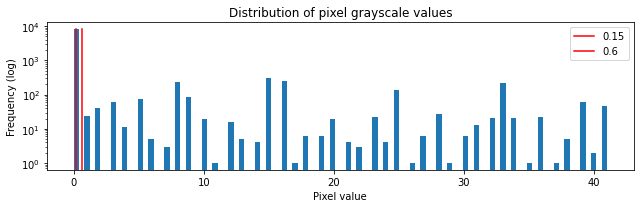

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(9,3))


n, bins, patches = ax.hist(im.flatten(), bins=100)
ax.plot([thr1, thr1], [0, n[0]], 'r-', label='{}'.format(thr1))
ax.plot([thr2, thr2], [0, n[0]], 'r-', label='{}'.format(thr2))
ax.set_yscale('log')
ax.set_xlabel('Pixel value')
ax.set_ylabel('Frequency (log)')
ax.set_title('Distribution of pixel grayscale values')
plt.legend()
plt.tight_layout()

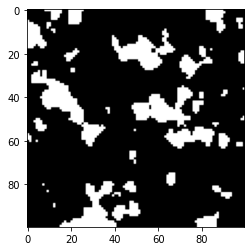

In [22]:
plt.rcParams['image.cmap'] = 'Greys'
def a (x):
    if x > thr2:
        return 0
    if x < thr1:
        return 2
    else:
        return 1
    
v = np.vectorize(a)
im_thresh = v(im)

plt.imshow((im_thresh))
plt.show()